# Условие 1: Задача 1
1. Постройте график
2. Назовите график
3. Сделайте именование оси x и оси y
4. Сделайте выводы

<ul>
    <li> Скачать следующие данные: kc-house-data
    <li> Изучите стоимости недвижимости
    <li> Изучите распределение квадратуры жилой
    <li> Изучите распределение года постройки
</ul>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('kc_house_data.csv')
df.sample(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2750,2408600160,20150228T000000,352000.0,4,2.50,1252,25002,1.0,0,0,...,8,992,260,1996,0,98001,47.3216,-122.291,1860,25002
1783,8598900125,20150406T000000,443000.0,3,1.75,1530,8028,1.0,0,0,...,7,1200,330,1967,0,98177,47.7768,-122.361,1530,8028


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

В файле представлена информация по продажам домов. 
Приведена их стоимость, общее состояние, год постройки / реновации и дата продажи.
Данные заполнены, пустых записей нет 

## Изучите стоимости недвижимости

In [31]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<Axes: ylabel='price'>

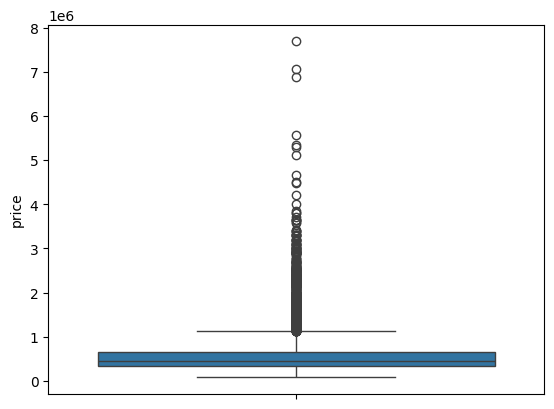

In [32]:
sns.boxplot(df.price)

Стоимость проданных домов варируется от 7.500000e+04 до 7.700000e+06. 
Средняя стоимость составляет 5.400881e+05, медиана: 4.500000e+05
Разброс относительно среднего: 3.671272e+05

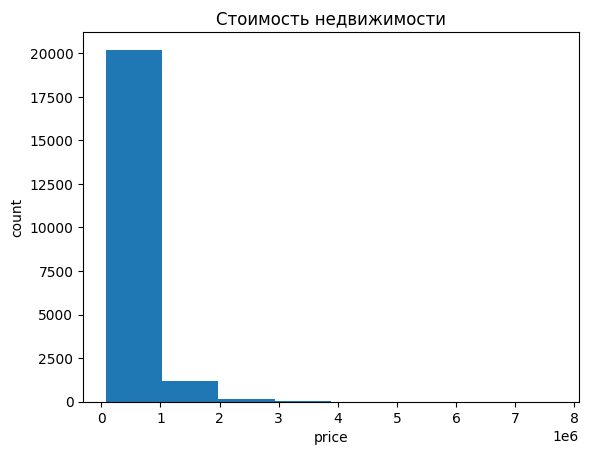

In [33]:
plt.xlabel('price')
plt.ylabel('count')
plt.title('Стоимость недвижимости')
plt.hist(df['price'], bins=8);

Основная часть домов была продана за цену до 1e+06. 
Наблюдаеются выбросы, где стоимость продажи достигает до 8e+06

## Изучите распределение квадратуры жилой площади

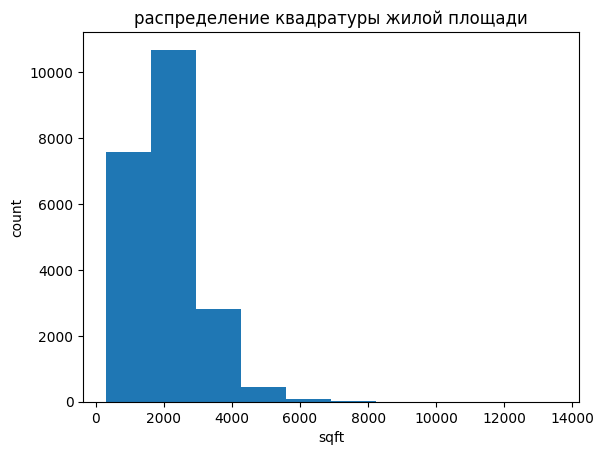

In [34]:
plt.xlabel('sqft')
plt.ylabel('count')
plt.title('распределение квадратуры жилой площади')
plt.hist(df['sqft_living']);

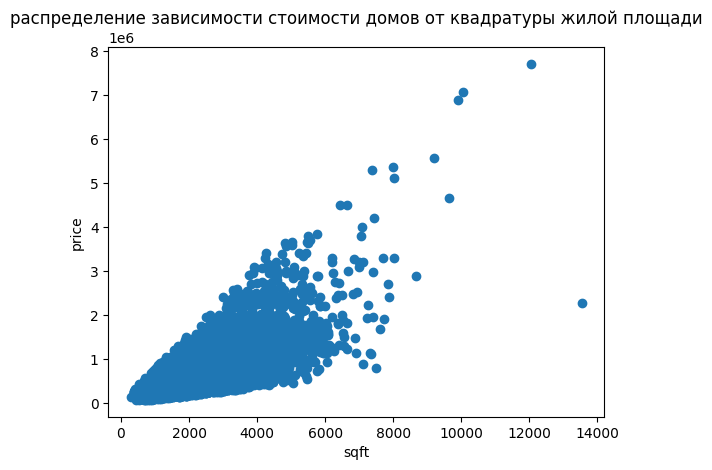

In [35]:
plt.xlabel('sqft')
plt.ylabel('price')
plt.title('распределение зависимости стоимости домов от квадратуры жилой площади')
plt.scatter(df['sqft_living'], df['price']);

In [36]:
df[df['sqft_living'] == df['sqft_living'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


Основная чать проданных домов составляла жилую площадь где-то до 3000 кв.м.
Наблюдается логичная тенденция увеличения цены стоимости с увеличением квадратуры жилой площади.
Есть дом, который выбивается из данной тенденции: его цена относительно мала при огромной жилой площади. Видимо, это свяано с тем, что данный дом был построен достаточно давно (в 1999 году) и не имел ренновации 

## Изучите распределение года постройки

In [37]:
df.yr_built.describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

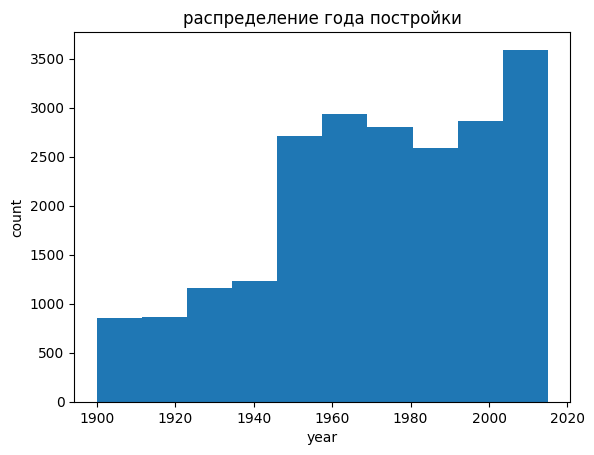

In [38]:
plt.xlabel('year')
plt.ylabel('count')
plt.title('распределение года постройки')
plt.hist(df['yr_built']);

Год постройки домов распределен от 1900 до 2015 года. Существенных выбросов в года постройки не наблюдается. 
Медиана почти равна среднему значению. Из чего можно сделать вывод, что дома из года в год строились относительно в одинаковом количестве.
Основная часть проданных домов была построена в интервале с 1950 по 2015 год. 

# Условие 2: 2 задача
1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2. Изучите распределение этажей домов
3. Изучите распределение состояния домов

##  Изучите распределение домов от наличия вида на набережную 

In [39]:
data = df['waterfront'].value_counts()
data

waterfront
0    21450
1      163
Name: count, dtype: int64

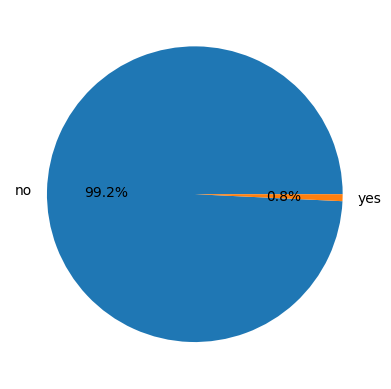

In [40]:
plt.pie(data.values, autopct='%1.1f%%', labels=['no', 'yes']);

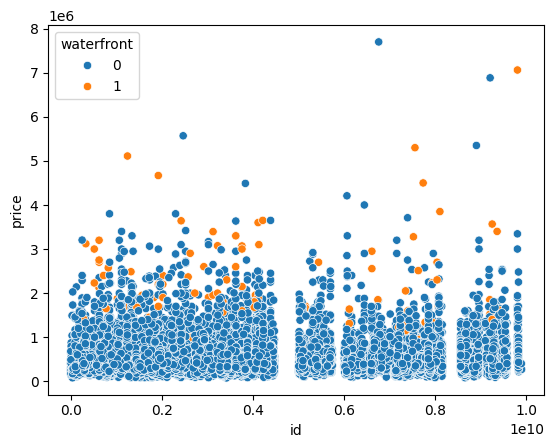

In [41]:
sns.scatterplot(x=df['id'], y=df['price'], hue=df['waterfront']);

Количество домов с видом на набережную составляет очень малую часть от общего числа проданных домов.
По ценовой политике видно, что такие дома стоят дороже.

## Изучите распределение этажей домов

In [42]:
df.floors.describe()

count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

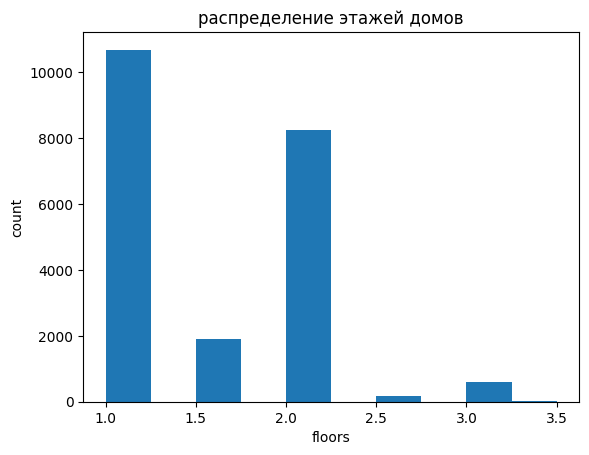

In [43]:
plt.xlabel('floors')
plt.ylabel('count')
plt.title('распределение этажей домов')
plt.hist(df['floors']);

<Axes: xlabel='floors', ylabel='price'>

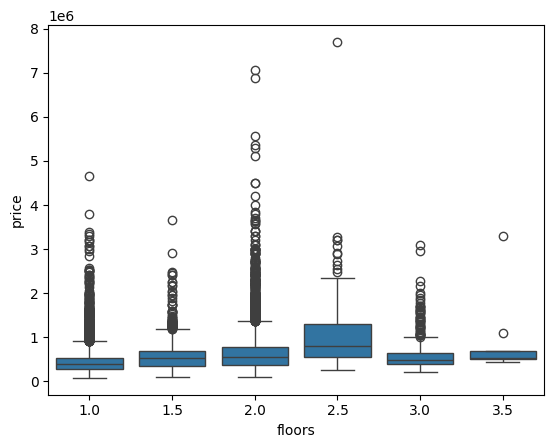

In [44]:
sns.boxplot(x=df['floors'], y=df['price'])

Этажность домов распределена от 1 до 3.5 этажей.
Наибольшее количество проданных домов - одноэтажные и двухэтажные.
По ценовой потилитика можно сделать вывод, что наибольшую цену имеют 2.5 этажные дома.
Средняя стоимость 3 и 3.5 этажных домов, как ни странно, находится на уровне 2-х этажный домов. Возможно, такие дома удалены от набережной и имеют меньшую жилую площадь (площадь фундамента меньше)

## Изучите распределение состояния домов

In [45]:
df['condition'].describe()

count    21613.000000
mean         3.409430
std          0.650743
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

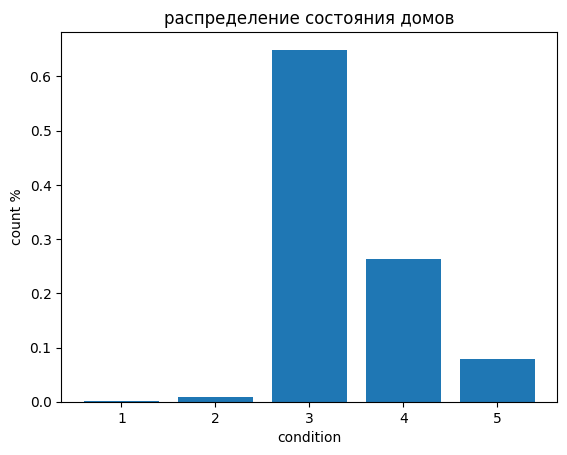

In [46]:
data = df['condition'].value_counts(normalize=True)
plt.xlabel('condition')
plt.ylabel('count %')
plt.title('распределение состояния домов')
plt.bar(data.index, data.values);

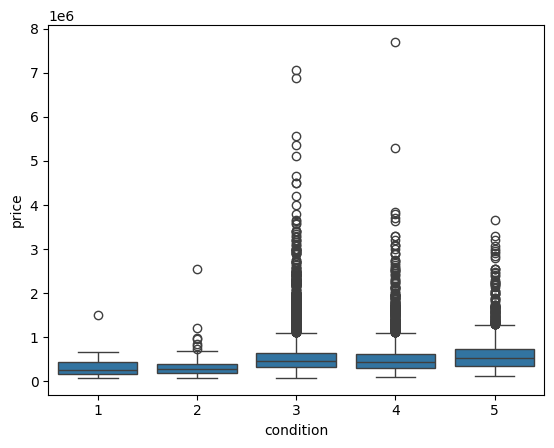

In [47]:
sns.boxplot(x=df['condition'], y=df['price']);

Состояния домов оцениваются по шкале от 1 до 5. Наибольшее количество проданных домов имеет среднюю оценку = 3.
Средняя стоимость проданных домов больше у тех, которые имеют состояние = 5. Меньшая средняя стоимость у домов с оценкой состояния = 1. (здесь все логично) 

# Условие 3: 3 задача
1. Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
2. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

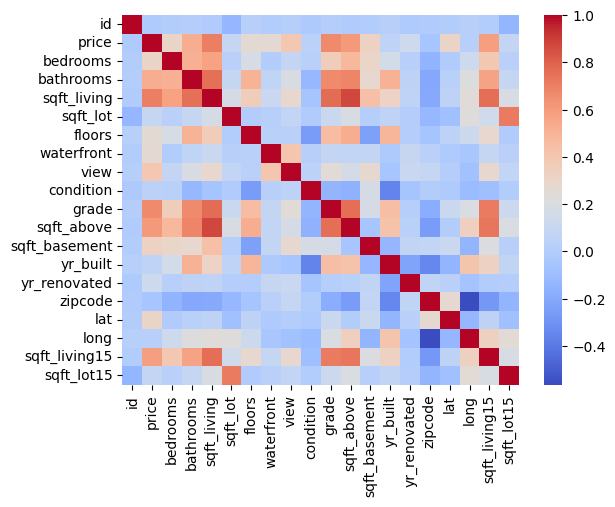

In [48]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='coolwarm');

In [49]:
df.grade.value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

# Выводы
В процессе исследований данных были изучены влияния на стоимость недвижимости по следующим характеристикам:
1. Зависимость от квадратуры жилой площади (<i>Наблюдается логичная тенденция увеличения цены стоимости с увеличением квадратуры жилой площади</i>)
2. Зависимость от вида на набережную (<i>дома с видом на набережную стоят дороже</i>)
3. По этажности (<i>наибольшее количество проданных домов - одноэтажные и двухэтажные.
По ценовой потилитика можно сделать вывод, что наибольшую цену имеют 2.5 этажные дома</i>)
4. По состоянию (<i>Здесь логичная зависимость - чем состояние оценвается выше - тем выше стомость</i>)

По <b>тепловой карте</b> можно сделать следующие выводы:
Наблюдается высокая корреляция стоимости недвижимости от
<ul>
    <li> общей жилой площади
    <li> количества ванных комнат
    <li> характеристики grade (видимо, какой-то класс дома)
</ul>
Есть положительная корреляция стоимости недвижимости от этажности дома, количества спален и вида на набережную.
</br>
Слабая корреляция наблюдается от оценки состояния и года постройки дома 